<a href="https://colab.research.google.com/github/lanahc/AI-Coursework-2025-/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1
from google.colab import files

uplodaded = files.upload()

Saving Airplane_Crashes_and_Fatalities_Since_1908.csv to Airplane_Crashes_and_Fatalities_Since_1908.csv


In [2]:
#1
import pandas as pd
airplane_df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
#1
print (airplane_df.head())

         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN

In [4]:
#2
airplane_df.shape

(5268, 13)

In [5]:
#3 Display the last 75 rows
last_75_rows = airplane_df.tail(75)
print(last_75_rows)

            Date   Time                                           Location  \
5193  03/15/2008  08:15                                     Nbagu, Nigeria   
5194  04/03/2008  11:00                                     Lawa, Suriname   
5195  04/09/2008  23:27                                Bundeena, Australia   
5196  04/11/2008  22:15                                 Chrisinau, Moldova   
5197  04/15/2008  14:30                                        Goma, Congo   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #  \
5193        T

In [6]:
#4
airplane_df.isnull().sum()

,0
Date,0
Time,2219
Location,20
Operator,18
Flight #,4199
Route,1707
Type,27
Registration,335
cn/In,1228
Aboard,22


#4 Methods and Justification
1. Time - Imputation; mode/ median - Time is often recorded precisely. If there are few missing values, they could be dropped.
2. Location - Imputation; mode/deletion - Location is a text. Imputing with mode ( which is the standard method for location), might introducce bias thus deletion is safer if only a few are missing.
3. Operator - Imputation; mode - Mode is appropriate since you can't guess the operator.
4. Flight# - Imputation; unknown/deletion - They are unique id's therefore it is best to replace with 'unknown'.
5. Route - Imputation; mode/'unknown' - It highly varies therefore 'unknown' is best.
6. Type - Imputation; mode - Using mode us a reasonable approach for statical analysis.
7. Registration - Imputation; unknown/deletion - It is a unique id therfore replacing with unknown is better.
8. cn/ln - Imputation; unknown/deletion - construction number(cn) is a unique id, best to replace with unknown
9. Aboard, fatalities, ground, summary - Imputation(zero/ mean/median) - They are numerical counts, a missing value means zero or can be imputed with the mean/median to preserve the distribution. Summary is text, use unknown/mode.

In [22]:
#5
fatality_locations = airplane_df[['Date', 'Location', 'Aboard', 'Fatalities']]
fatality_locations.head()

,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


In [23]:
#6
max_fatalities_index = fatality_locations['Fatalities'].idxmax()
highest_fatalities_record = fatality_locations.loc[max_fatalities_index]

max_fatalities_count = int(highest_fatalities_record['Fatalities'])
highest_fatalities_date = highest_fatalities_record['Date']

print(f"The highest number of recorded fatalities is {max_fatalities_count}, which occurred on {max_fatalities_date}.")



The highest number of recorded fatalities is 583, which occurred on 03/27/1977.


In [11]:
#7
no_fatalities_crashes = fatality_locations[
    (fatality_locations['Fatalities'] == 0) &
    (fatality_locations['Aboard'] > 0)

]
count_no_fatalities_crashes = len(no_fatalities_crashes)
print(f"Number of crashes with no fatalities: {count_no_fatalities_crashes}")


Number of crashes with no fatalities: 56


In [13]:
#8
split_location = fatality_locations['Location'].str.split(', ', expand=True)
# Select only the first two columns from the split result
split_location = split_location[[0, 1]]
split_location.columns = ['Region', 'State/Country']
fatality_locations = pd.concat([fatality_locations, split_location], axis=1)
fatality_locations.drop(columns=['Location'], inplace=True)
fatality_locations.head()

,Date,Aboard,Fatalities,Region,State/Country
0,09/17/1908,2.0,1.0,Fort Myer,Virginia
1,07/12/1912,5.0,5.0,AtlantiCity,New Jersey
2,08/06/1913,1.0,1.0,Victoria,British Columbia
3,09/09/1913,20.0,14.0,Over the North Sea,None
4,10/17/1913,30.0,30.0,Near Johannisthal,Germany


In [16]:
#9
order_fatalities_df = fatality_locations.sort_values(by='Fatalities', ascending=False)
top_100_fatalities = order_fatalities_df.head(100)
print(top_100_fatalities)

            Date  Aboard  Fatalities                    Region  \
2963  03/27/1977   644.0       583.0                  Tenerife   
3568  08/12/1985   524.0       520.0               Mt. Osutaka   
4455  11/12/1996   349.0       349.0         Near Charkhidadri   
2726  03/03/1974   346.0       346.0         Near Ermenonville   
3562  06/23/1985   329.0       329.0              AtlantiOcean   
...          ...     ...         ...                       ...   
4852  04/15/2002   166.0       128.0                     Busan   
3198  01/21/1980   128.0       128.0              Elburz Mtns.   
1701  12/16/1960   128.0       128.0  Staten Island / Brooklyn   
5108  07/09/2006   203.0       128.0                   Irkutsk   
1433  06/30/1956   128.0       128.0              Grand Canyon   

                  State/Country  
2963             Canary Islands  
3568          near Ueno Village  
4455                      India  
2726                     France  
3562  110 miles West of Ireland  
...

Text(0.5, 1.0, 'Top 25 Countries with Highest Fatalities')

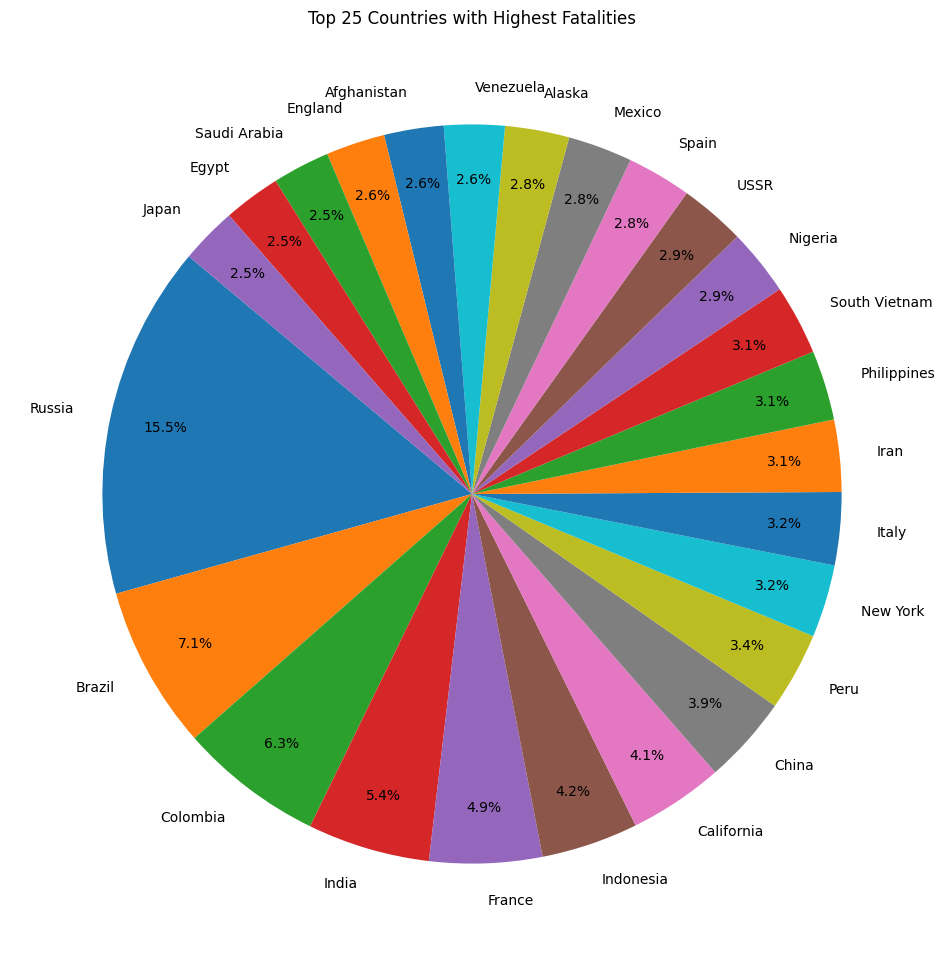

In [20]:
#10
import matplotlib.pyplot as plt
import seaborn as sns

country_fatalities = fatality_locations.groupby('State/Country')['Fatalities'].sum().reset_index()
country_fatalities = country_fatalities.sort_values(by='Fatalities', ascending=False)

top_25_countries = country_fatalities.head(25)

plt.figure(figsize=(14, 12))
plt.pie(top_25_countries['Fatalities'], labels=top_25_countries['State/Country'], autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Top 25 Countries with Highest Fatalities')